In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from datetime import datetime as datetime
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
database_path = "Resources/hawaii.sqlite"
# Create an engine that can talk to the database
engine = create_engine(f"sqlite:///{database_path}")
conn = engine.connect()


In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [8]:
## Store Measurements to DF
measurements = pd.read_sql("SELECT * FROM Measurement", conn)
measurements.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [9]:
## Store Stations to DF
stations = pd.read_sql("SELECT * FROM Station", conn)
stations.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


# Exploratory Climate Analysis

In [43]:
# Perform a query to retrieve last 12 months of precipitation data and precipitation scores. 
# Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

travel_start_date = '2016/01/01'
travel_end_date = '2016/01/08'

# date 1 year ago from travel_date
year_ago = datetime.strptime(travel_start_date, '%Y/%m/%d') - dt.timedelta(days=365)
print(f"Returning precipitation data from {year_ago} and {travel_start_date}")

# Save the query results as a Pandas DataFrame and set the index to the date column
year_precipitation_scores = pd.DataFrame(session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date >= year_ago).\
    filter(Measurement.date < travel_start_date).\
    order_by(Measurement.date).all()).set_index('date')
year_precipitation_scores.head()

Returning precipitation data from 2015-01-01 00:00:00 and 2016/01/01


,prcp
date,
2015-01-02,0.04
2015-01-02,0.01
2015-01-02,0.00
2015-01-02,NaN
2015-01-02,0.00


In [44]:
# Sort the dataframe by date
year_precipitation_scores = year_precipitation_scores.sort_values(by='date', ascending=True)
year_precipitation_scores

,prcp
date,
2015-01-02,0.04
2015-01-02,0.01
2015-01-02,0.00
2015-01-02,NaN
2015-01-02,0.00
...,...
2016-12-31,0.25
2016-12-31,0.01
2016-12-31,0.62


In [45]:
# Drop rows where prcp=NaN
year_precipitation_scores = year_precipitation_scores.dropna()
#year_precipitation_scores['prcp'].max()
#year_precipitation_scores = year_precipitation_scores.loc[year_precipitation_scores['prcp'] > 0]
year_precipitation_scores

,prcp
date,
2015-01-02,0.04
2015-01-02,0.01
2015-01-02,0.00
2015-01-02,0.00
2015-01-02,0.00
...,...
2016-12-31,0.25
2016-12-31,0.01
2016-12-31,0.62


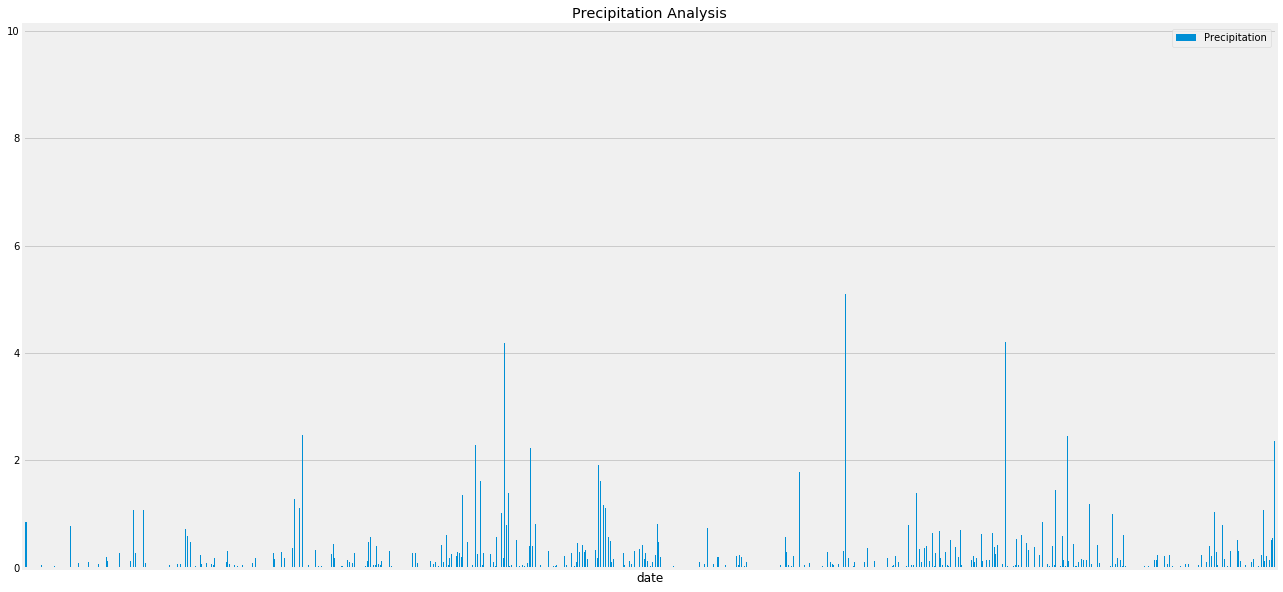

In [46]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_chart = year_precipitation_scores.plot(kind="bar",title="Precipitation Analysis",figsize=(20,10))
# precipitation_chart.set_xlabel("Date")
# precipitation_chart.set_ylabel("Precipitation")
precipitation_chart.legend(['Precipitation'])
precipitation_chart.set_xticks([])
plt.show()

In [52]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# For 1 year of the precipitation data
year_precipitation_scores.describe()

,prcp
count,4238.000000
mean,0.190031
std,0.495604
min,0.000000
25%,0.000000
50%,0.020000
75%,0.150000
max,9.640000


In [58]:
# For all the precipitation data
measurements['prcp'].describe()

count    18103.000000
mean         0.160644
std          0.468746
min          0.000000
25%          0.000000
50%          0.010000
75%          0.110000
max         11.530000
Name: prcp, dtype: float64

In [ ]:
# Design a query to show how many stations are available in this dataset?


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
